In [1]:
# from numpy import *
# import scipy as sp
# from pandas import *
# from rpy2.robjects.packages import importr
# import rpy2.robjects as ro
# from rpy2.robjects import pandas2ri
# from rpy2.robjects import r
# pandas2ri.activate()


In [2]:
# ro.r('library(\'multispatialCCM\')')
# ro.r('ccm_data_out<-make_ccm_data()')
# ro.r('Accm<-ccm_data_out$Accm')
# ro.r('Bccm<-ccm_data_out$Bccm')

In [6]:
from nltk import data
from nltk.corpus.reader import CHILDESCorpusReader
from nltk.probability import FreqDist
import entropies7.entropies7 as Ent
from numpy import *
import scipy as sp
import numpy as np


corpus_root = data.find('corpora/childes/English-UK-MOR/')

eng = CHILDESCorpusReader(corpus_root, 'Manchester/.*.xml')
nmmfile = "NLTKCHILDES/morph-eng.csv"
nmsfile = "NLTKCHILDES/syntax-eng.csv"
files = eng.fileids()

# Group files by age, child, and corpus
resDict = {}
for f in files:
    age = eng.age(f,month=True)[0] 
    child = f.split("/")[1]
    if resDict.has_key((child,age)):
        resDict[child,age] += [f]
    else:
        resDict[child,age] = [f]

150


In [9]:
fout = open(nmmfile,"w")
print >> fout, "Child Age N.child H.child H.child.S H.child.I S.child N.mother H.mother H.mother.S H.mother.I S.mother" 
for child,age in resDict.keys():
    ff = resDict[child,age]
    # Frequency dists of child and mother for this particular child and age (raw) 
    # Bottleneck of runtime
    fchild = FreqDist(eng.words(ff,speaker="CHI",replace=True))
    fmother = FreqDist(eng.words(ff,speaker="MOT",replace=True))
    # Frequency dists of child and mother for this particular child and age (stemmed) 
    # Notice that we split words on "-" to transform "be-3S" to "be"
    # Bottleneck of runtime
    fchildS = FreqDist([w.split("-")[0] for w in eng.words(ff,speaker="CHI",replace=True,stem=True)])
    fmotherS = FreqDist([w.split("-")[0] for w in eng.words(ff,speaker="MOT",replace=True,stem=True)])
    # Statistics
    nchild = sum(array(fchild.values()))
    nmother = sum(array(fmother.values()))
    # Entropies
    Hchild = Ent.Entropy(fchild,method="CWJ")
    Hmother = Ent.Entropy(fmother,method="CWJ")
    # Entropies (stemmed - Lexical Diversity)
    HchildS = Ent.Entropy(fchildS,method="CWJ")
    HmotherS = Ent.Entropy(fmotherS,method="CWJ")
    # Inflectional Diversity
    HchildI = Hchild - HchildS
    HmotherI = Hmother - HmotherS
    # Syntactic Diversity
    child_sent = eng.sents(ff, speaker="CHI",replace=True)
    for i in range(len(child_sent)):
        child_sent[i] = len(child_sent[i])
    Schild = np.mean(child_sent)
    mother_sent = eng.sents(ff, speaker="MOT",replace=True)
    for i in range(len(mother_sent)):
        mother_sent[i] = len(mother_sent[i])
    Smother = np.mean(mother_sent)
    print >> fout, child,age,nchild,Hchild,HchildS,HchildI,Schild,nmother,Hmother,HmotherS,HmotherI,Smother
    
    
fout.close()

carl
carl
carl
carl
carl
carl
carl
carl
carl
carl
carl
carl


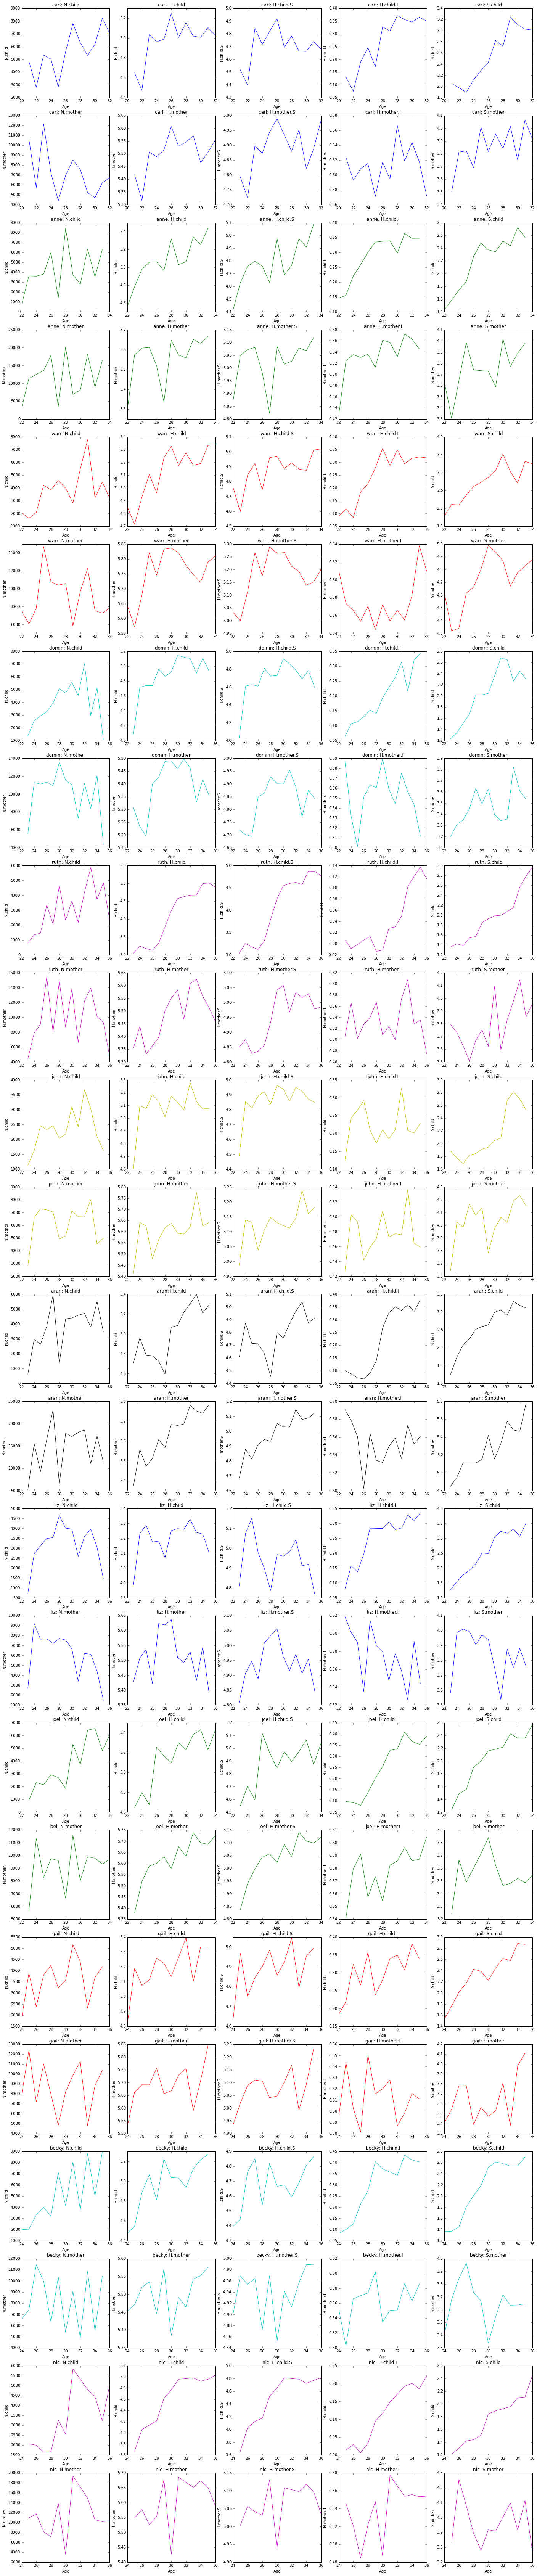

In [68]:
%matplotlib inline
from pandas import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Read data as a ssv (space-separated file)
df = pandas.read_csv("NLTKCHILDES/morph-eng.csv", delimiter= ' ')

# Sort data by age, increasing
sorted_df = df.sort(columns=['Age'])

# Get list of the names of the children
name_list = Series(sorted_df['Child']).unique()

# Get list of the names of the columns
column_list = list(sorted_df.columns.values)

# Remove the column name 'Child' because it contains strings
column_list.remove('Child')

# Convert all other columns to floats
sorted_df[column_list] = sorted_df[column_list].astype(float)

# Create a list of data frames corresponding to each child
child_split_df = {}
for child in name_list:
    child_split_df[child] = sorted_df[sorted_df['Child'] == child]

color_list = ['b','g','r','c','m','y','k'] 
    
# Define a function which plots a certain statistic for a certain child
def plot_stat(axarr, name, child_split_df, stat, row_num, column_num, color_num):
    axarr[row_num, column_num].plot((child_split_df[name])['Age'],  (child_split_df[name])[stat], linestyle = '-', color=color_list[color_num % 7])
    axarr[row_num, column_num].set_xlabel('Age')
    axarr[row_num, column_num].set_ylabel(stat)
    axarr[row_num, column_num].set_title(name + ": " + stat)

column_list.remove('Age')
name_num = 1

fig, axarr = plt.subplots(2 * len(name_list), 5)
fig.set_size_inches(24, 120)
row_num = 0
color_num = 0

for name in name_list:
    column_num = 0
    for stat in column_list:
        plot_stat(axarr, name, child_split_df, stat, row_num, column_num, color_num)
        column_num += 1
        if(column_num == 5):
            row_num += 1
            column_num = 0
    color_num += 1

plt.show()